# Computational Complexity

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In computer science, the computational complexity or simply complexity of an algorithm is the amount of resources required to run it. Particular focus is given to computation **time** (generally measured by the number of needed elementary operations) and **memory storage** requirements.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from lime.lime_tabular import LimeTabularExplainer
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# Notations

To measure the time of execution of an algorith we usually use the next notions:

Consider $ f $ and $ g $ functions on the real numbers.

* $ f = O(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists M > 0, c > 0: \ \ \ |f(x)| \leq c \cdot |g(x)| \ \ \ \ \ \forall x > M$ (Version 1)

* $ f = O(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists \delta > 0, c > 0: \ \ \ |f(x)| \leq c \cdot |g(x)| \ \ \ \ \ \forall x \in (a - \delta, a + \delta)$ (Version 2)

* $ f = o(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \forall c > 0,  \exists M > 0: \ \ \ |f(x)| \leq c \cdot |g(x)| \ \ \ \ \ \forall x > M$ (Version 1)

* $ f = o(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \forall c > 0,  \exists M > 0: \ \ \ |f(x)| \leq c \cdot |g(x)| \ \ \ \ \ \forall x \in (a - \delta, a + \delta)$ (Version 2)

* $ f = \Omega(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists M > 0, c > 0: \ \ \ |f(x)| \geq c \cdot |g(x)| \ \ \ \ \ \forall x > M$ (Version 1)

* $ f = \Omega(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists \delta > 0, c > 0: \ \ \ |f(x)| \geq c \cdot |g(x)| \ \ \ \ \ \forall x \in (a - \delta, a + \delta)$ (Version 2)

* $ f = w(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \forall c > 0,  \exists M > 0: \ \ \ |f(x)| \geq c \cdot |g(x)| \ \ \ \ \ \forall x > M$ (Version 1)

* $ f = w(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \forall c > 0,  \exists M > 0: \ \ \ |f(x)| \geq c \cdot |g(x)| \ \ \ \ \ \forall x \in (a - \delta, a + \delta)$ (Version 2)

* $ f = \Theta(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists M > 0, c_1, c_2 > 0: \ \ \ c_1 \cdot |g(x)| \leq |f(x)| \leq c_2 \cdot |g(x)| \ \ \ \ \ \forall x > M$ (Version 1)

* $ f = \Theta(g) \ \ \ \ \ \Leftrightarrow \ \ \ \ \ \exists \delta > 0, c_1, c_2 > 0: \ \ \ c_1 \cdot |g(x)| \leq |f(x)| \leq c_2 \cdot |g(x)| \ \ \ \ \ \forall x \in (a - \delta, a + \delta)$ (Version 2)

# Reminders

$ \sum_{i = 1}^n i = \cfrac{n \cdot (n + 1)}{2} $

$ \sum_{i = 1}^n i^2 = \cfrac{n \cdot (n + 1) \cdot (2n + 1)}{6} $

$ \sum_{i = 1}^n i^3 = \left( \cfrac{n \cdot (n + 1)}{2} \right)^2 $

# Exercise 1

See whats combination of 3 elements in a list its sum are zero.

In [5]:
list_elements = [0, -1, 2, -3, 1]

### Implementation 1

In [6]:
def three_sum(list_elements):
    
    N = len(list_elements)

    for i in range(0, N - 2):
        for j in range(i + 1, N - 1):
            for k in range(j + 1, N):

                sum_part = list_elements[i] + list_elements[j] + list_elements[k]

                if sum_part == 0:

                    print('Tuple:', (list_elements[i], list_elements[j], list_elements[k]))

In [7]:
three_sum(list_elements)

Tuple: (0, -1, 1)
Tuple: (2, -3, 1)


### Computation complexity 1

Asumming a cost $ c $ to sum elements then:

$ T(n) = \sum_{i = 1}^{n - 2} \sum_{j = i + 1}^{n - 1} \sum_{k = j + 1}^{n} c = c \cdot \sum_{i = 1}^{n - 2} \sum_{j = i + 1}^{n - 1} \sum_{k = j + 1}^{n} 1 = c \cdot \sum_{i = 1}^{n - 2} \sum_{j = i + 1}^{n - 1} \left( \sum_{k = j + 1}^{n} 1 \right) $

Now:

$ \sum_{k = j + 1}^{n} 1 = [n - (j + 1)] + 1 = (n - j) $

$ \Rightarrow $

$ T(n) = c \cdot \sum_{i = 1}^{n - 2} \sum_{j = i + 1}^{n - 1} (n - j) = c \cdot \sum_{i = 1}^{n - 2} \left( \sum_{j = i + 1}^{n - 1} (n - j) \right) $

Now:

$ \sum_{j = i + 1}^{n - 1} (n - j) = \cfrac{(n^2 - n)}{2} + i \cdot \left( \cfrac{1}{2} - n \right) + i^2 \cdot \left( \cfrac{1}{2} \right) $

$ \Rightarrow $

$ T(n) = c \cdot \sum_{i = 1}^{n - 2} \sum_{j = i + 1}^{n - 1} (n - j) = c \cdot \sum_{i = 1}^{n - 2} \left[ \cfrac{(n^2 - n)}{2} + i \cdot \left( \cfrac{1}{2} - n \right) + i^2 \cdot \left( \cfrac{1}{2} \right) \right] $

Now:

$ \sum_{i = 1}^{n - 2} \left[ \cfrac{(n^2 - n)}{2} + i \cdot \left( \cfrac{1}{2} - n \right) + i^2 \cdot \left( \cfrac{1}{2} \right) \right] = \cfrac{n \cdot (n - 1) \cdot (n - 2)}{6} $

$ \Rightarrow $

$ T(n) = c \cdot \cfrac{n \cdot (n - 1) \cdot (n - 2)}{6}$

**Conclusion:** $ T(n) \in O(n^3) $

### Implementation 2

In [8]:
def three_sum_2(list_elements):
    
    N = len(list_elements)

    combi_ele = set()

    for i in range(0, N - 1):
        for j in range(i + 1, N):

            sum_part = -(list_elements[i] + list_elements[j])

            if sum_part in combi_ele:
                
                print('Tuple ant:', (sum_part, list_elements[i], list_elements[j]))

            combi_ele.add(list_elements[i])

In [9]:
three_sum_2(list_elements)

Tuple ant: (0, -1, 1)
Tuple ant: (2, -3, 1)


### Computation complexity 2

Asumming a cost $ c $ to sum elements and save the value in a set, then:

$ T(n) = \sum_{i = 1}^{n - 1} \sum_{j = i + 1}^{n} c = c \cdot \sum_{i = 1}^{n - 1} \sum_{j = i + 1}^{n} 1 = c \cdot \sum_{i = 1}^{n - 1} \left( \sum_{j = i + 1}^{n} 1 \right) $

Now:

$ \sum_{j = i + 1}^{n} 1 = [n - (i + 1)] + 1 = (n - i) $

$ \Rightarrow $

$ T(n) = c \cdot \sum_{i = 1}^{n - 1} \left( \sum_{j = i + 1}^{n} 1 \right) = c \cdot \sum_{i = 1}^{n - 1} (n - i)  $

Now:

$ \sum_{i = 1}^{n - 1} (n - i) = \cfrac{n \cdot (n - 1)}{2} $

$ \Rightarrow $

$ T(n) = c \cdot \sum_{i = 1}^{n - 1} (n - i) = c \cdot \cfrac{n \cdot (n - 1)}{2} $

**Conclusion:** $ T(n) \in O(n^2) $

# Exercise 2: Search in Binary Tree.

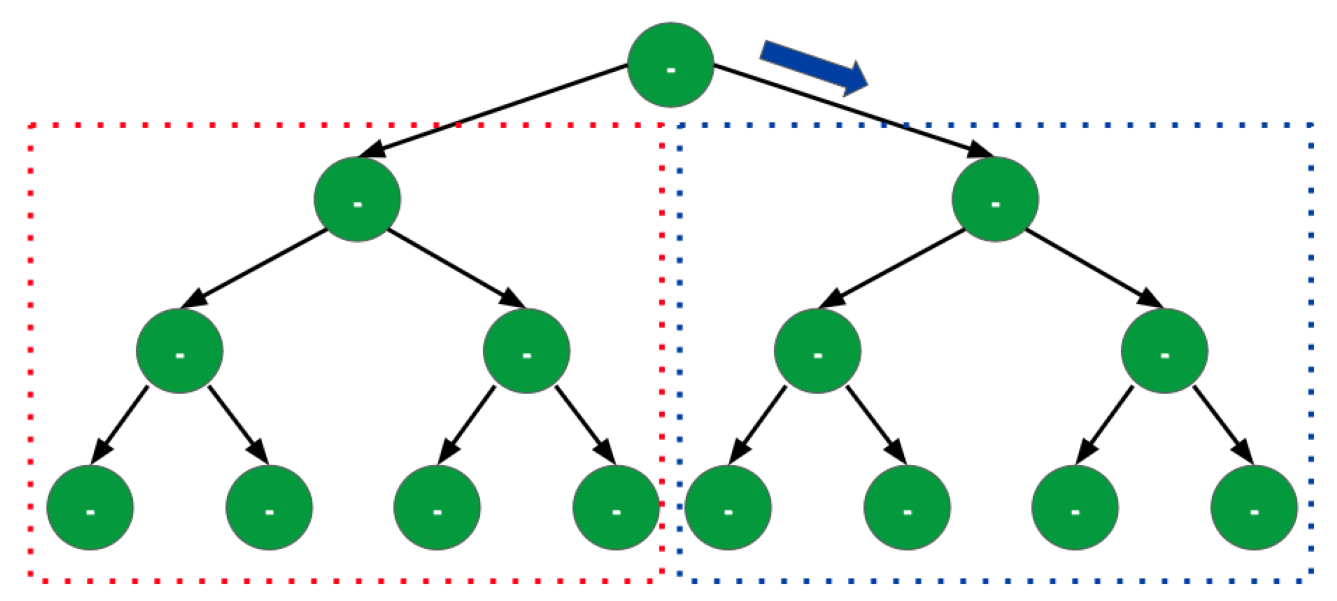

In [10]:
display_img('BST.png', 17, 17)

Cost of function of search an element in a Binary Tree.

Asumming $ c $ the cost of visit a node. Consider a Binary tree with $ n $ elements.

$ T(n) = T \left( \cfrac{n}{2} \right) + c $

Asumming $ n = 2^k $, then:

$ T(2^k) = T(2^{k-1}) + c $

We can create the next succession:

$ a_k = T(2^k) $

Then:

$ a_k = a_{k-1} + c $ 

$ \Rightarrow $

$ a_m = a_{m-1} + c = [a_{m-2} + c] + c = a_{m-2} + 2c  $

$ \Rightarrow $

$ a_k = a_0 + k \cdot c $


$ \Rightarrow $

$ T(2^k) = T(1) + k \cdot c $

Remember $ n = 2^k \ \Rightarrow k = \cfrac{ln(n)}{ln(2)} $ 

$ \Rightarrow $ 

$ T(n) = T(1) + \cfrac{ln(n)}{ln(2)} \cdot c $


**Conclusion:** $ T(n) \in O(ln(n)) $

### Time of execution

In [11]:
end = time.time()

In [12]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
